# DISCLAIMER
- Sumber : https://www.kaggle.com/santoshd3/bank-customers
- Tidak ada info yang komprehensif mengenai dataset, khususnya mengenai variabel *IsActiveMember*.
- Oleh karena tidak adanya info, maka diputuskan untuk:
    - Membangun konteks secara fiktif dengan mempertimbangkan kegunaannya sebagai bagian dari alur *story telling* kepada *user*.
    - Variabel **IsActiveMember** dipercaya bukan sebagai indikator nasabah dalam hal kepemilikan macam - macam rekening / tabungan. Hal ini dikarenakan baik nasabah yang aktif maupun tidak, sama - sama mempunyai produk bank lebih dari 0 (nilai unik masing - masing berkisar dari 1 - 4). Jadi, variabel ini diasumsikan sebagai tingkat keaktifan nasabah dalam mengikuti promo / program bank.

In [2]:
# Impor modul dan berkas
# Pandas untuk manipulasi data, matplotlib dan seaborn untuk visualisasi
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Membuang kolom - kolom yang tidak relevan terhadap analisis
custData = pd.read_csv("bank.csv").drop(["RowNumber", "CustomerId", "Surname"], 1)

# Business Problem

Bank Purwad baru berdiri sekitar 7 tahun silam di Indonesia. Namun, kiprahnya selama ini tidak bisa dipandang sebelah mata dalam ruang kompetisi bank swasta. Dalam 3 tahun terakhir saja, Bank Purwad sudah berhasil membuka cabang di Spanyol, Jerman, dan Perancis.

---------------------------------------------------------------------------------------------------------------------------

Selama ini kita berhasil menghimpun total 10.000 nasabah baru di luar negeri. Pencapaian ini melampaui prestasi Bank Hacktiv (6.300), Bank Algo (8.400), dan Bank DQLab (9.700). Kemenangan ini patut kita syukuri dan apresiasi. Penghargaan tertinggi sudah selayaknya kita berikan pada Tim Sales dan Tim Marketing karena kinerjanya yang sudah sangat optimal. Namun begitu, kami (Tim Data Science) menemukan sebuah kemunduran yang cukup mengkhawatirkan.

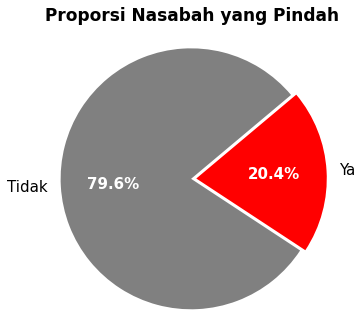

In [3]:
# Menampilkan presentase nasabah yang pindah secara keseluruhan
# Parameter'textprops' berdampak pada presentase serta label.
# Maka itu, subplots harus digunakan untuk dapat memberi warna, ukuran, dan style yang berbeda terhadap keduanya. 

fig, churnMember = plt.subplots()
percentage, label, chart = churnMember.pie(
        custData.groupby("Exited").count()["CreditScore"], explode = (.01, .05),
        labels = ["Tidak", "Ya"], autopct = "%1.1f%%", startangle = 40,
        colors = ["grey", "red"], textprops = {"size" : 15,"color" : "black"},
        radius = 1.5)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 15})
plt.title("Proporsi Nasabah yang Pindah", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.2)

plt.show()

Kami menemukan bahwa dari total seluruh nasabah terdaftar, ada sekitar 20.4% nasabah yang akhirnya memutuskan untuk pindah. Angka ini tentu bukan angka yang kecil karena hampir menyentuh seperempat total nasabah. Berdasar info dari tim Relationship Officer (RO), 63% diantaranya pindah ke Bank Hacktiv, 29% pindah ke Bank Algo, dan 8% sisanya tidak diketahui. Permasalahan ini harus segera diselesaikan mengingat pemerintah pada pertengahan tahun depan akan menyerahkan insentif sebesar 100 Milyar Rupiah kepada 2 bank swasta dengan jumlah nasabah tertinggi. Jika manajemen nasabah seperti ini dibiarkan, kami khawatir jumlah nasabah akan terus tergerus hingga tahun depan.

# Tujuan EDA

Tujuan dari laporan dan analisis ini tidak lain adalah untuk mendukung dan mendorong tim RO maupun *Customer Service* (CS) untuk memperbaiki sistem manajemen nasabah dan komunikasnya. Adapun bentuk dukungan tersebut secara teknis akan terwujud dalam kategorisasi nasabah yang memiliki kecenderungan untuk pindah. Nantinya, dengan 'peramalan' ini, diharapkan tim RO dapat dengan sigap menghubungi, memperbaiki hubungan, menawarkan kemudahan, ataupun mencari solusi terhadap permasalahan yang mungkin seorang nasabah hadapi terhadap Bank Purwad. Dengan begitu, angka penurunan jumlah nasabah bisa kita tekan atau bahkan hentikan setidaknya sampai pemerintah memberikan insentif. 

# Mengecek - menangani *missing values* serta melihat korelasi secara umum

Pada sub pembahasan ini, hanya dilakukan pengecekan secara umum. Pengecekan dan penanganan secara lebih spesifik dan komprehensif dilakukan pada sub pembahasan **5**.

In [4]:
# Tidak ditemukan data NULL
print("Jumlah data NULL : ", len(custData[custData.isnull().any(axis = 1)]), "baris")

Jumlah data NULL :  0 baris


In [5]:
print("Korelasi antar kolom :")
display(custData.corr())

Korelasi antar kolom :


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Sampai di sini, korelasi variabel numerik terkuat terhadap variabel ***Exited*** adalah ***Age***, ***Balance***, dan ***IsActiveMember***. Maka itu, kolom - kolom numerik yang tidak relevan diputuskan untuk dieliminasi.
Namun, sebelum melangkah lebih jauh, variabel - variabel tersebut harus dilihat distribusinya terlebih dahulu.

In [6]:
custData.drop(["CreditScore", "Tenure", "NumOfProducts", "HasCrCard", "EstimatedSalary"], 1, inplace = True)

# Analisis variabel

## Hubungan antara umur dan kepindahan nasabah

'Age' memiliki distribusi 'right skewed'. Oleh karena itu, untuk menilai korelasinya harus menggunakan metode Spearman.



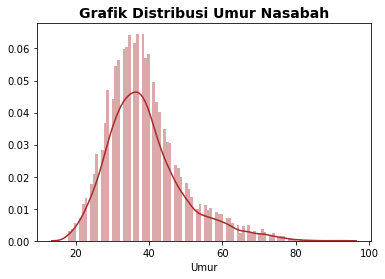


Nilai korelasi 'Age' dan 'Exited' :


,Age,Exited
Age,1.000000,0.323968
Exited,0.323968,1.000000


In [7]:
# Distribusi data
print("'Age' memiliki distribusi 'right skewed'. Oleh karena itu, untuk menilai korelasinya harus menggunakan metode Spearman.\n")
sns.distplot(custData["Age"], kde = True, bins = 100, color = "brown")
plt.title("Grafik Distribusi Umur Nasabah", size = 14, weight = "bold")
plt.xlabel("Umur")
plt.show()

print("\nNilai korelasi 'Age' dan 'Exited' :")
display(custData[["Age", "Exited"]].corr(method = "spearman"))

Korelasi ini bernilai positif yang berarti semakin tua seorang nasabah, maka semakin besar kecenderungannya untuk keluar dari Bank Purwad.

Persebaran outliers :


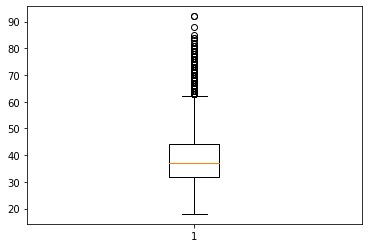

In [8]:
# Penanganan outliers data
print("Persebaran outliers :")
plt.boxplot(custData["Age"])
plt.show()

Seperti halnya visualisasi distribusi data di atas, *boxplot* juga menggambarkan hal yang sama. Sentralitas data berada pada rentang umur sekitar 32 - 44 tahun. Pada sisi lain, *outliers* berada di atas sekitar 62 tahun. Ini menandakan bahwa nasabah kita yang umurnya cukup tua cenderung sedikit dibandingkan nasabah usia produktif. *Outliers* ini tidak akan dieliminasi karena akan berbicara banyak sebagai salah satu faktor determinan pindahnya nasabah.

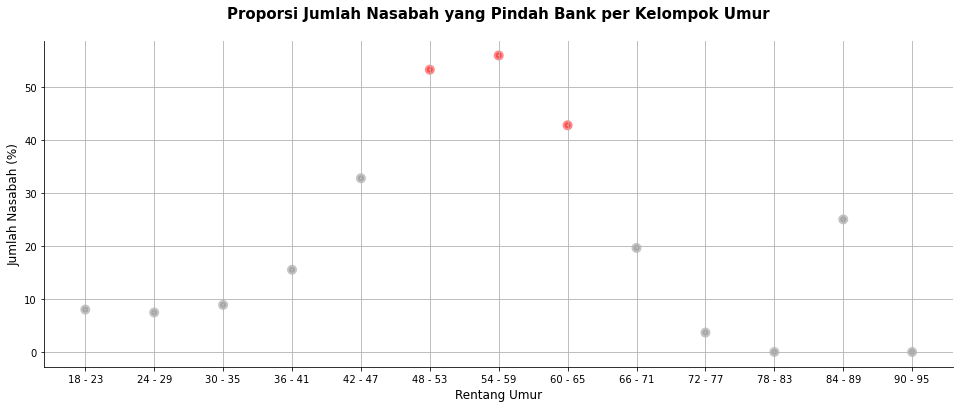

In [9]:
# Membuat rentang umur untuk memudahkan visualisasi dan klasifikasi seluruh nasabah.
# Jarak rentang diatur dengan 5 poin. Hal ini dikarenakan 5 tahun adalah angka yang paling ideal.
# Kita ambil contoh rentang 8 / 10 tahun, maka nasabah dengan umur 18 akan masuk ke kategori 18 - 26 / 18 - 28.
# Hal tersebut tentu sangat tidak realistis mengingat nasabah dengan umur 18 (kuliah) belum mempunyai penghasilan tetap layaknya nasabah dengan usia cukup matang (25 -28).
# Pada sisi lain, jika jarak terlalu pendek (misal 3 tahun), maka kelompok akan terlalu banyak dan menyulitkan untuk visualisasi.
# Implikasi dari rentang ini adalah pada kecenderungan kesamaan perilaku nasabah.
ageRange, ar = [], range(custData["Age"].min(), custData["Age"].max(), 5)

for a in custData["Age"]:
    count = -1
    for i, r in enumerate(ar):
        count += 1
        try:
            if (r + count) <= a <= (ar[i + 1] + count):
                ageRange.append(f"{r + count} - {ar[i + 1] + count}")
                break
            elif (ar[i + 1] + count + 1) <= a <= (ar[i + 2] + count + 1):
                ageRange.append(f"{ar[i + 1] + count + 1} - {ar[i + 2] + count + 1}")
                break
        except:
            ageRange.append(f"> {r + 1}")
            break
                
custData["ageRange"] = ageRange

# Menampilkan bukti lanjutan korelasi antar variabel dengan scatter plot.
# Oleh karena distribusi umur tidak normal, maka kita tidak bisa langsung menggunakan jumlah per kelompok sebagai perbandingan. 
# Untuk mensiasatinya, maka digunakan presentase per kelompok per keputusan (pindah / tidak pindah).
ageProp = pd.crosstab(custData["ageRange"], custData["Exited"])
ageProp["sum"] = ageProp[[0, 1]].sum(axis = 1)
ageProp["propNo"] = [(ageProp[0][i] / ageProp["sum"][i]) * 100 for i in ageProp.index]
ageProp["propYes"] = [(ageProp[1][i] / ageProp["sum"][i]) * 100 for i in ageProp.index]

# Memakai subplots karena ingin membuang frame bagian atas dan kanan
fig, churnAge = plt.subplots(figsize = (16.3, 6))
churnAge.spines["right"].set_visible(False)
churnAge.spines["top"].set_visible(False)
plt.grid(True)
plt.scatter(ageProp.index, ageProp["propYes"],
            color = ["grey", "grey", "grey", "grey", "grey", "red", "red", "red", "grey", "grey", "grey", "grey", "grey"],
            linewidths = 4, alpha = 0.45)
plt.annotate("Batas tren positif korelasi",
            xy = ("53 - 58", 58),
            xytext = ("48 - 53", 46.5),
            fontsize = 13,
            arrowprops = {"facecolor" : "lightblue", "shrink" : 0.1},
            horizontalalignment = "left", verticalalignment = 'bottom')
plt.title("Proporsi Jumlah Nasabah yang Pindah Bank per Kelompok Umur", size = 15, weight = "bold", y = 1.05)
plt.xlabel("Rentang Umur", size = 12)
plt.ylabel("Jumlah Nasabah (%)", size = 12)
plt.show()

Setelah kami analisis, ternyata nasabah yang proporsinya paling banyak pindah adalah nasabah dari rentang umur 48 - 65 dengan puncaknya pada umur **54 - 59**. Korelasi positif antara kedua variabel ternyata **tidak sepenuhnya berjalan linear**. Dapat dilihat bahwa memasuki kelompok umur 60 - 65 terjadi penurunan yang cukup jauh. Hal ini **menandakan** bahwa tren korelasi positif berjalan konsisten untuk nasabah dalam rentang umur 18 - 59.

Sampai disini dapat disimpulkan bahwa semakin tua seorang nasabah, maka semakin besar kecenderungannya untuk keluar dari Bank Purwad. Namun, **harus diingat bahwa kesimpulan ini berlaku sampai batas usia nasabah 59 tahun**.

In [10]:
# Distribusi nasabah dalam kelompok umur tertinggi per negara dan jenis kelamin
print("Jumlah nasabah dengan umur 48 - 59 yang pindah bank per jenis kelamin dan negara asalnya :")
churnSegAge = pd.crosstab(custData[custData["ageRange"].str.contains("48 - 53|54 - 59") & custData["Exited"].astype(str).str.contains("1")]["Geography"],
                 custData[custData["ageRange"].str.contains("48 - 53|54 - 59") & custData["Exited"].astype(str).str.contains("1")]["Gender"])
churnSegAge["Total"] = churnSegAge.sum(axis = 1)
display(churnSegAge.sort_values("Total", ascending = False))

Jumlah nasabah dengan umur 48 - 59 yang pindah bank per jenis kelamin dan negara asalnya :


Gender,Female,Male,Total
Geography,,,
Germany,141,122,263
France,145,112,257
Spain,70,52,122


Jerman adalah negara dengan jumlah nasabah yang pindah terbanyak. Namun begitu, persebaran nasabah antar negara terlihat tidak merata, terutama Spanyol yang memiliki perbedaan jumlah yang cukup jauh. Maka dari itu, harus digunakan proporsi agar kesimpulan yang diambil tidak bias.

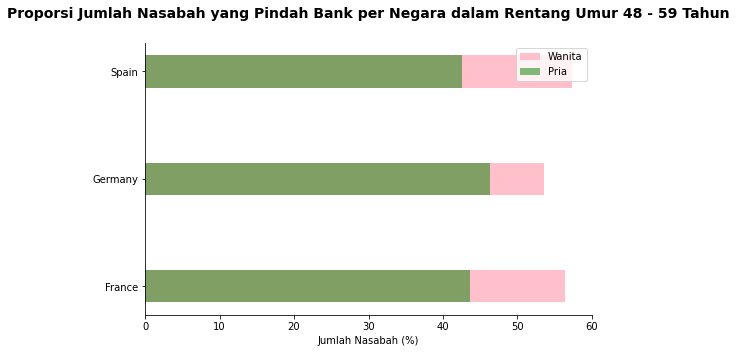

In [11]:
# Mencari hubungan kelompok umur tertinggi dengan negara dan jenis kelamin
# Merubah jumlah per jenis kelamin menjadi proporsi
churnSegAge["propFemale"] = [(churnSegAge["Female"][i] / churnSegAge["Total"][i]) * 100 for i in churnSegAge.index]
churnSegAge["propMale"] = [(churnSegAge["Male"][i] / churnSegAge["Total"][i]) * 100 for i in churnSegAge.index]

# Memakai subplots karena ingin membuang frame bagian atas
fig, churnCountry = plt.subplots(figsize = (8, 5))
churnCountry.spines["top"].set_visible(False)
churnCountry.spines["right"].set_visible(False)
plt.barh(churnSegAge.index, churnSegAge["propFemale"],
       color = "pink",
       height = 0.3,
       linewidth = 1)

plt.barh(churnSegAge.index, churnSegAge["propMale"],
       color = "green",
       height = 0.3,
       alpha = 0.5,
       linewidth = 1)
plt.legend(("Wanita", "Pria"))
plt.xlim(0, 60)
plt.title("Proporsi Jumlah Nasabah yang Pindah Bank per Negara dalam Rentang Umur 48 - 59 Tahun", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.xlabel("Jumlah Nasabah (%)")

plt.show()

Negara asal seorang nasabah tidak berpengaruh pada keputusannya untuk pindah bank. Namun, jika dilihat lebih spesifik, jenis kelamin cukup berpengaruh. Jenis kelamin wanita konsisten berada di atas 53% atau lebih dari setengah dari total nasabah pada rentang umur 48 - 59 yang pindah. Adapun faktor yang melatarbelakanginya bisa jadi berasal dari hubungan nasabah dengan ROnya maupun pelayanan yang buruk dari tim CS. Berbeda dengan pria, wanita cenderung memiliki sifat yang lebih perasa. Umur yang tergolong tua juga diyakini turut memberi dampak tambahan pada sifat tersebut. Oleh sebab itu perlu ditinjau lebih lanjut kepada tim RO dan CS.

## Hubungan antara saldo dan kepindahan nasabah

'Balance' memiliki kecenderungan distribusi 'bimodal'. Oleh karena itu, untuk menilai korelasinya harus menggunakan metode Spearman.



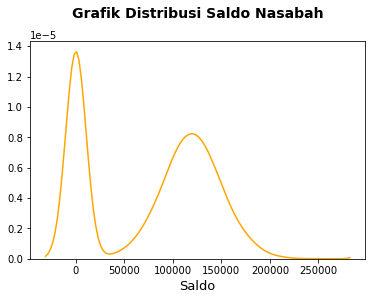


Nilai korelasi 'Balance' dan 'Exited' :


,Balance,Exited
Balance,1.00000,0.11111
Exited,0.11111,1.00000


In [12]:
# Distribusi data
print("'Balance' memiliki kecenderungan distribusi 'bimodal'. Oleh karena itu, untuk menilai korelasinya harus menggunakan metode Spearman.\n")

# Parameter 'hist = False' agar grafik KDE terlihat lebih jelas
sns.distplot(custData["Balance"], hist = False, bins = 100, color = "orange")
plt.title("Grafik Distribusi Saldo Nasabah", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.08)
plt.xlabel("Saldo", size = 13)
plt.show()

print("\nNilai korelasi 'Balance' dan 'Exited' :")
display(custData[["Balance", "Exited"]].corr(method = "spearman"))

Dapat dilihat bahwa persebaran data saldo tidak merata dan menumpuk di dua kelompok, dimana salah satunya adalah 0 USD. Nasabah yang masuk dalam kelompok ini cukup banyak dan patut untuk dicari tahu latar belakangnya. Ada dua kemungkinan untuk menjawabnya.

**Pertama**, besar kemungkinan saat tim Data Engineer menghimpun data posisi saldo nasabah secara kebetulan sedang 0 (mengingat kebijakan Bank Purwad yang membolehkan sisa saldo hingga 0). Asumsi pertama ini memiliki dua cabang asumsi lagi:
- Nasabah secara kebetulan menggunakan semua saldonya untuk berbelanja maupun keperluan lain hingga habis.
- Nasabah dengan sengaja menarik semua sisa uangnya di Bank Purwad karena ingin pindah ke bank lain.

**Kedua**, nasabah - nasabah tersebut adalah nasabah baru (berkaitan dengan kebijakan Bank Purwad yang memperbolehkan membuka rekening tanpa minimal dana mengendap).

Nasabah dengan saldo 0 tersebut tidak kami eliminasi ataupun manipulasi, mengingat ia bukanlah *missing values* dan tentunya mempunyai dampak terhadap perilaku nasabah yang pindah maupun tidak pindah.

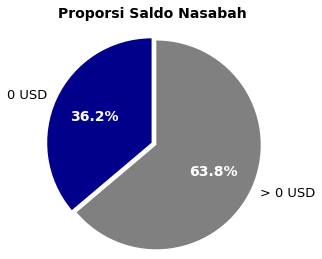

In [13]:
# Perbandingan jumlah nasabah dengan saldo 0 USD dan di atas 0 USD
fig, balanceProp = plt.subplots()
percentage, label, chart = balanceProp.pie(
        [(len(custData[custData["Balance"] == 0]) / len(custData)) * 100,
        (len(custData[custData["Balance"] != 0]) / len(custData)) * 100],
        explode = (.01, .05), labels = ["0 USD", "> 0 USD"], autopct = "%1.1f%%",
        startangle = 90, colors = ["darkblue", "grey"], textprops = {"size" : 13,"color" : "black"},
        radius = 1.2)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 14})
plt.title("Proporsi Saldo Nasabah", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.05)

plt.show()

36,2% bukanlah angka yang kecil dan 'normal' menurut kami. Harus dicari tahu lebih dalam apakah ada hubungan antara nasabah dengan saldo 0 dengn keputusannya untuk pindah dari Bank Purwad. Selain itu, kita juga bisa melihat distribusi umur nasabah yang masuk dalam kelompok ini.

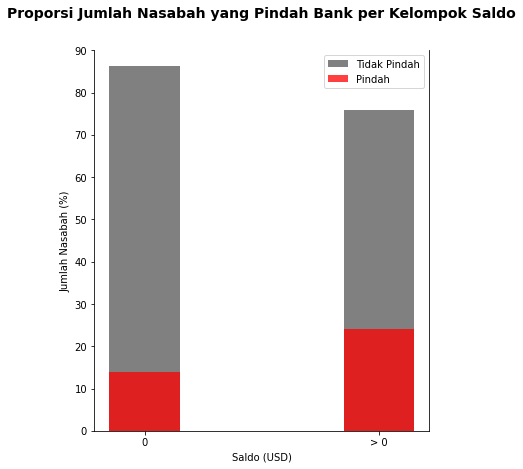

In [14]:
# Memberi label kelompok saldo nasabah untuk memudahkan klasifikasi nasabah
custData["balanceLabel"] = custData["Balance"].apply(lambda x : "0" if x == 0 else "> 0")

# Menampilkan bukti lanjutan korelasi antar variabel dengan bar plot.
# Oleh karena distribusi saldo tidak normal, maka kita tidak bisa langsung menggunakan jumlah per kelompok sebagai perbandingan. 
# Untuk mensiasatinya, maka digunakan presentase per kelompok per keputusan (pindah / tidak pindah).
balanceProp = pd.crosstab(custData["balanceLabel"], custData["Exited"])
balanceProp["sum"] = balanceProp[[0, 1]].sum(axis = 1)
balanceProp["propNo"] = [(balanceProp[0][i] / balanceProp["sum"][i]) * 100 for i in balanceProp.index]
balanceProp["propYes"] = [(balanceProp[1][i] / balanceProp["sum"][i]) * 100 for i in balanceProp.index]

# Memakai subplots karena ingin membuang frame bagian atas
fig, churnBalance = plt.subplots(figsize = (6,7))
churnBalance.spines["top"].set_visible(False)
plt.bar(balanceProp.index, balanceProp["propNo"],
       color = "grey",
       width = 0.3,
       linewidth = 1)

plt.bar(balanceProp.index, balanceProp["propYes"],
       color = "red",
       alpha = 0.75,
       width = 0.3,
       linewidth = 1)
plt.legend(("Tidak Pindah", "Pindah"))
plt.ylim(0, 90)
plt.title("Proporsi Jumlah Nasabah yang Pindah Bank per Kelompok Saldo", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.xlabel("Saldo (USD)")
plt.ylabel("Jumlah Nasabah (%)")

plt.show()

Grafik di atas mematahkan salah satu asumsi kami bahwa nasabah dengan saldo 0 USD adalah nasabah yang sengaja menarik semua uangnya dari Bank Purwad karena merasa tidak puas dan berencana untuk pindah bank. Ternyata sebaliknya, kelompok nasabah inilah yang lebih loyal. Maka dari itu, fokus analisis harus di pusatkan pada kelompok saldo di atas 0 USD.

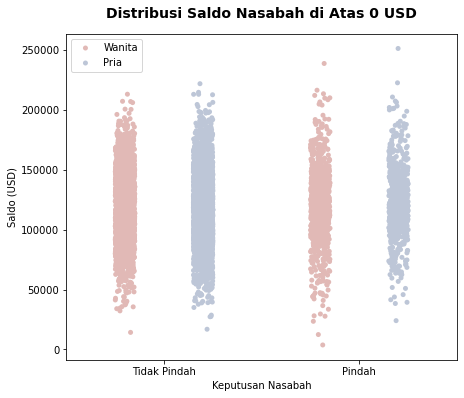

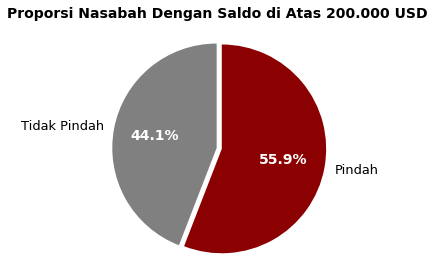

In [15]:
# Memaparkan distribusi saldo nasabah di atas 0 USD
# Memakai subplots karena ingin mengganti xticklabels menjadi "Tidak Pindah" dan "Pindah"
fig, balanceMoreZero = plt.subplots(figsize = (7, 6))
sns.stripplot(custData[custData["balanceLabel"].str.contains("> 0")]["Exited"], custData[custData["balanceLabel"].str.contains("> 0")]["Balance"],
              hue = custData[custData["balanceLabel"].str.contains("> 0")]["Gender"],
              palette = "vlag_r", jitter = True, dodge = True)
plt.xlabel("Keputusan Nasabah")
plt.ylabel("Saldo (USD)")
balanceMoreZero.set_xticklabels(["Tidak Pindah", "Pindah"])
plt.title("Distribusi Saldo Nasabah di Atas 0 USD", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.03)
plt.legend(("Wanita", "Pria"))
plt.show()
print("\n")

# Memaparkan presentase jumlah nasabah dengan saldo di atas 200.000 USD yang pindah
fig, priorMember = plt.subplots()
percentage, label, chart = priorMember.pie(
        [(custData[custData["Balance"] > 200000].groupby("Exited").count()["Gender"][0] / custData[custData["Balance"] > 200000].groupby("Exited").count().sum()[0]) * 100,
        (custData[custData["Balance"] > 200000].groupby("Exited").count()["Gender"][1] / custData[custData["Balance"] > 200000].groupby("Exited").count().sum()[0]) * 100],
        explode = (.01, .05), labels = ["Tidak Pindah", "Pindah"], autopct = "%1.1f%%",
        startangle = 90, colors = ["grey", "darkred"], textprops = {"size" : 13,"color" : "black"},
        radius = 1.2)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 14})
plt.title("Proporsi Nasabah Dengan Saldo di Atas 200.000 USD", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)

plt.show()

Baik kelompok nasabah yang memutuskan untuk pindah ataupun tidak, sama - sama memiliki konsentrasi saldo pada rentang sekitar 90.000 - 160.000. Namun, nasabah yang tidak pindah terlihat memiliki distribusi yang lebih sporadis.

Data ini tentunya mengejutkan kita semua. Terlihat bahwa dalam kelompok nasabah yang pindah terdapat beberapa nasabah prioritas kita, yang lebih tepatnya memiliki saldo di atas 200.000 USD. Memang tidak bisa serta merta disimpulkan jikalau semakin tinggi saldo seorang nasabah, maka kemungkinannya untuk pindah semakin besar. Namun, kami menemukan **korelasi tersebut dalam skala kecil jika seorang nasabah sudah masuk dalam kategori prioritas (saldo di atas 200.000 USD)**. Pada sisi lain, **jenis kelamin nampaknya tidak berpengaruh lagi jika saldo nasabah sudah sebesar itu**. Hal ini tentunya mengkhawatirkan mengingat nasabah prioritas adalah nasabah yang paling potensial untuk kita tawari kredit besar. Selain itu, dana minimal mengendap mereka juga jauh lebih tinggi dari nasabah biasa.

Ada beberapa hal yang mungkin menyebabkan kecewanya kelompok nasabah ini:
- Beberapa di antaranya adalah proses peminjaman / kredit yang cenderung rumit dan lama.
- Bunga yang kita tawarkan kalah bersaing dengan bank - bank daerah / swasta setempat, khususnya di Perancis dan Spanyol.

In [71]:
# Asal negara nasabah prioritas dan bukan prioritas yang pindah
# Menggunakan proporsi untuk keduanya karena persebaran yang tidak merata
countryPrioChurn = custData[custData["Balance"] > 200000][custData[custData["Balance"] > 200000]["Exited"].astype(str).str.contains("1")].groupby("Geography").count()["Gender"]
countryPrio = custData[custData["Balance"] > 200000].groupby("Geography").count()[["Gender"]].rename(columns = {
    "Gender" : "Total Member"
}).sort_values("Total Member", ascending = False)
countryPrio["Churn"] = countryPrioChurn
countryPrio["Churn"] = countryPrio["Churn"].fillna(0).astype(int)
countryPrio["Churn (%)"] = [(countryPrio["Churn"][i] / countryPrio["Total Member"][i]) * 100 for i in countryPrio.index]

print("Presentase nasabah prioritas yang pindah per negara :")
display(countryPrio.drop("Churn", 1))

ordMemberChurn = custData[custData["Balance"] < 200000][custData[custData["Balance"] < 200000]["Exited"].astype(str).str.contains("1")].groupby("Geography").count()["Gender"]
ordMember = custData[custData["Balance"] < 200000].groupby("Geography")[["Gender"]].count().sort_values("Gender", ascending = False).rename(columns = {
    "Gender" : "Total Member"
})
ordMember["Churn"] = ordMemberChurn
ordMember["Churn (%)"] = [round(((ordMember["Churn"][i] / ordMember["Total Member"][i]) * 100), 1) for i in ordMember.index]

print("\n\nPresentase nasabah biasa yang pindah per negara :")
display(ordMember.drop("Churn", 1))

Presentase nasabah prioritas yang pindah per negara :


,Total Member,Churn (%)
Geography,,
France,16,62.5
Spain,12,75.0
Germany,6,0.0




Presentase nasabah biasa yang pindah per negara :


,Total Member,Churn (%)
Geography,,
France,4998,16.0
Germany,2503,32.5
Spain,2465,16.4


Untuk kategori nasabah biasa, Jerman adalah negara yang presentase kepindahannya tertinggi. Sedangkan, untuk kelompok nasabah prioritas Spanyol adalah yang terbanyak.

## 4.3 Hubungan antara keaktifan dan kepindahan nasabah

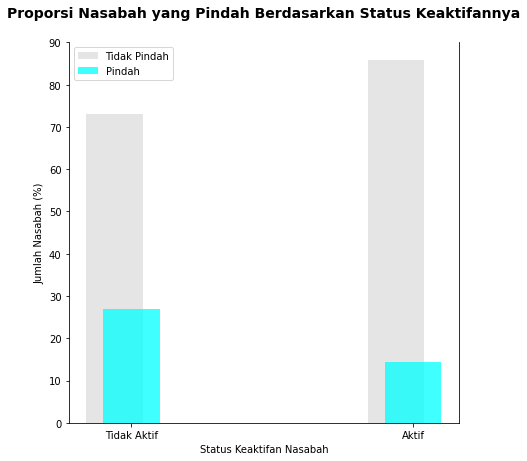

In [17]:
# Menampilkan hubungan antara status keaktifan nasabah dengan keputusannya untuk pindah
# Oleh karena jumlah yang tidak seimbang antara nasabah aktif dan tidak aktif, maka akan lebih rasional jika perbandingan didasarkan pada proporsi.
activeMember = pd.crosstab(custData["IsActiveMember"], custData["Exited"])
activeMember["sum"] = activeMember.sum(axis = 1)
activeMember["propNo"] = [(activeMember[0][i] / activeMember["sum"][i]) * 100 for i in activeMember.index]
activeMember["propYes"] = [(activeMember[1][i] / activeMember["sum"][i]) * 100 for i in activeMember.index]

# Menggunakan subplots karena ingin mengurangi jumlah xticks dan mengganti xticklabels
fig, activeMemberChurn = plt.subplots(figsize = (7, 7))
plt.bar(activeMember.index-.06, activeMember["propNo"],
       color = "black",
       alpha = 0.1,
       width = .20,
       linewidth = 0.25)

plt.bar(activeMember.index, activeMember["propYes"],
       color = "cyan",
       width = .20,
       alpha = 0.75,
       linewidth = 0.25)
plt.locator_params(axis = "x", nbins = 2)
activeMemberChurn.set_xticklabels(["", "Tidak Aktif", "Aktif"])
activeMemberChurn.spines["top"].set_visible(False)
plt.xlabel("Status Keaktifan Nasabah")
plt.ylabel("Jumlah Nasabah (%)")
plt.ylim(0, 90)
plt.legend(("Tidak Pindah", "Pindah"))
plt.title("Proporsi Nasabah yang Pindah Berdasarkan Status Keaktifannya", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.05)

plt.show()

Variabel terakhir ini nampaknya normal dan rasional jika dibandingkan dengan fakta di lapangan. Secara lumrah, nasabah yang tingkat keaktifannya lebih tinggi tentu saja tidak akan mudah untuk pindah. Ada beberapa hal yang mungkin berkaitan, salah satu yang terkuat adalah seperti keuntungan yang selama ini di dapat, bisa berupa undian / promo / keuntungan dari program kita. Sedangkan sebaliknya, nasabah yang tidak terlibat aktif dalam kegiatan dan program kita tentunya mempunyai 'ikatan' dan loyalitas yang lebih rendah. Dengan begitu tidak ada yang mengikatnya ketika ingin pindah dari Bank Purwad.

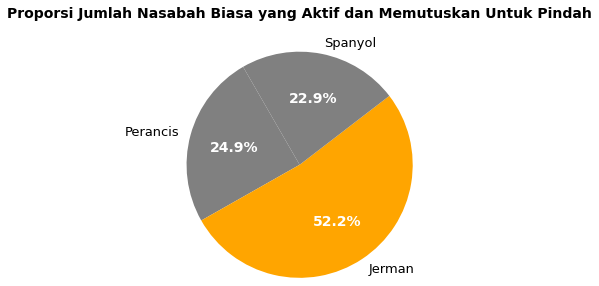

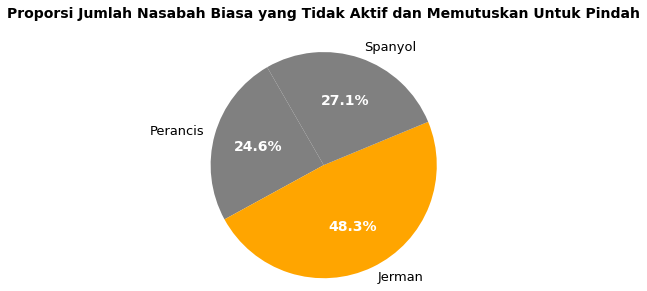

In [78]:
# Menampilkan proporsi jumlah nasabah biasa yang aktif maupun tidak aktif dan pindah bank per negara asalnya
# Oleh karena distribusi keaktifan nasabah tidak normal, maka kita tidak bisa langsung menggunakan jumlah per negara sebagai perbandingan. 
# Untuk mensiasatinya, maka digunakan presentase per negara per keputusan (pindah / tidak pindah).
ordMember = custData[custData["Balance"] < 200000]
ActiveGeoMember = pd.crosstab(ordMember[ordMember["IsActiveMember"].astype(str).str.contains("1")]["Geography"], ordMember[ordMember["IsActiveMember"].astype(str).str.contains("1")]["Exited"])
ActiveGeoMember["sum"] = ActiveGeoMember.sum(axis = 1)
ActiveGeoMember["propNo"] = [(ActiveGeoMember[0][i] / ActiveGeoMember["sum"][i]) * 100 for i in ActiveGeoMember.index]
ActiveGeoMember["propYes"] = [(ActiveGeoMember[1][i] / ActiveGeoMember["sum"][i]) * 100 for i in ActiveGeoMember.index]

# Menggunakan subplots karena ingin merubah warna secara terpisah pada label dan presentase
fig, geoChurnActive = plt.subplots()
percentage, label, chart = geoChurnActive.pie(
        [ActiveGeoMember["propYes"]["France"],
        ActiveGeoMember["propYes"]["Germany"],
        ActiveGeoMember["propYes"]["Spain"]],
        labels = ["Perancis", "Jerman", "Spanyol"], autopct = "%1.1f%%",
        startangle = 120, colors = ["grey", "orange", "grey"], textprops = {"size" : 13,"color" : "black"},
        radius = 1.3)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 14})
plt.title("Proporsi Jumlah Nasabah Biasa yang Aktif dan Memutuskan Untuk Pindah", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.15)

plt.show()

nonActiveGeoMember = pd.crosstab(ordMember[ordMember["IsActiveMember"].astype(str).str.contains("0")]["Geography"], ordMember[ordMember["IsActiveMember"].astype(str).str.contains("0")]["Exited"])
nonActiveGeoMember["sum"] = nonActiveGeoMember.sum(axis = 1)
nonActiveGeoMember["propNo"] = [(nonActiveGeoMember[0][i] / nonActiveGeoMember["sum"][i]) * 100 for i in nonActiveGeoMember.index]
nonActiveGeoMember["propYes"] = [(nonActiveGeoMember[1][i] / nonActiveGeoMember["sum"][i]) * 100 for i in nonActiveGeoMember.index]

# Menggunakan subplots karena ingin merubah warna secara terpisah pada label dan presentase
fig, geoChurnNonActive = plt.subplots()
percentage, label, chart = geoChurnNonActive.pie(
        [nonActiveGeoMember["propYes"]["France"],
        nonActiveGeoMember["propYes"]["Germany"],
        nonActiveGeoMember["propYes"]["Spain"]],
        labels = ["Perancis", "Jerman", "Spanyol"], autopct = "%1.1f%%",
        startangle = 120, colors = ["grey", "orange", "grey"], textprops = {"size" : 13,"color" : "black"},
        radius = 1.3)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 14})
plt.title("Proporsi Jumlah Nasabah Biasa yang Tidak Aktif dan Memutuskan Untuk Pindah", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.15)
print("\n\n")
plt.show()

Baik dari kelompok nasabah biasa yang tidak aktif dan pindah maupun aktif dan pindah, ditemukan bahwa Jerman mendominasi proporsi dengan nilai yang **lebih dari setengah** dan **hampir setengah** dari total populasi. Bahkan, bisa dikatakan bahwa Jerman memiliki korelasi terkuat dengan variabel ini. Dengan kata lain dapat kami simpulkan bahwa variabel keaktifan nasabah **tidak berpengaruh di lapangan**.

**Perlu ditelusuri lebih lanjut** konteks sosial - budaya nasabah Jerman. Ada kemungkinan bahwa memang kultur nasabah kita disana yang tidak mudah puas dan mudah berpindah haluan. Nampaknya **perlu dibuat program khusus yang menargetkan nasabah di Jerman dengan mengadaptasi kebiasaan dan pola konsumsi setempat**.

# Rekomendasi

1. Lakukan *training* dan *screening* terhadap para RO yang menangani nasabah **wanita berusia 48 - 59 tahun**, terlepas dari mana negara asalanya. Besar kemungkinan permasalahan ini akibat buruknya manajemen hubungan mereka dengan nasabah. Opsi lainnya adalah merekrut ataupun menukar RO terkait dengan yang sudah berpengalaman. Divisi lain yang perlu diperbaiki adalah Customer Service. Kami meyakini bahwa buruknya penanganan masalah dan keluhan lewat CS juga turut memberi dampak, mengingat nasabah dalam kelompok ini cenderung lebih perasa.
2. Segera lakukan pendekatan khusus bagi nasabah prioritas (memiliki saldo di atas 200.000 USD) di Perancis dan Spanyol. Dua negara ini adalah sumber utama nasabah prioritas kita. Namun, disarankan agar pengembangan dan perbaikan difokuskan ke Spanyol. Hal ini dikarenakan presentase kepindahannya adalah yang tertinggi. Kami sarankan agar tim analis - bisnis **mengkaji ulang tingkat bunga yang ditwarkan** karena kemungkinan besar terlalu tinggi jika dibandingkan dengan bank swasta / daerah lain di Spanyol dan Perancis. **Penyesuaian dan kompromi dalam memberi pinjaman** pada nasabah prioritas di dua negara ini juga patut menjadi pertimbangan. Pasalnya, nasabah prioritas cenderung memiliki tingkat kredit produktif yang lebih tinggi dibandingkan nasabah biasa.
3. Dalam konteks nasabah biasa (memiliki saldo di bawah 200.000 USD), tidak ditemukan pengaruh khusus dalam variabel data. Namun, yang menarik adalah bahwa Jerman menjadi lumbung terbesar nasabah yang pindah. Ada dua kemungkinan disini: **Pertama**, konteks sosial - budaya - ekonomi Jerman yang belum tim kita mengerti penuh (sehingga diperlukan studi perbandingan lebih lanjut untuk memahaminya) dan **kedua** ada permasalahan sistem internal di Bank Purwad cabang Jerman. Maka itu kami menawarkan **dua solusi**:
    - Segera pahami dan pelajari konteks nasabah di Jerman kemudian bentuk program / manajemen baru yang dikhususkan untuk pasar setempat.
    - Segera investigasi dan perbaiki permasalahan dalam tubuh organisasi Bank Purwad Jerman.